# Week Five: Logistic Regression and Neural Networks

## Binary and Non-linear classification problems

For the past few weeks we've been focusing on one of the most popular and well-tested techniques in data science - linear regression. As a quick review, we've covered:

- basic linear regression
- multiple linear regression
- assumptions of linear regression
- variable selection

When is linear regression useful? When the dependent variable is continuous (ie; price of a house, number of likes, etc...). What about if we have binary decisions we need to make? For example, we could be looking at whether a student will be admitted to a certain school. The student has numeric test scores, but ultimately the decision is a YES or NO decision. There's no middle ground (*maybe* we can say that students who are 50/50 get put on a waitlist). In this case, it doesn't make any sense to model a relationship between dependent and independent variables as a line. We need a way to separate the two classes. This is what logistic regression allows us to do.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

# Popular Logistic Regression Use Cases:

- Email Spam Filter: Spam /No Spam
- Fraud Detection : Transaction is fraudulent, Yes/No
- Tumor: Benign/Malignant

In 2015, two professors used a logistic regression model to win Kaggle's March Madness competition:

source: https://www.nytimes.com/2015/03/22/opinion/sunday/making-march-madness-easy.html?_r=0

## Logistic Regression is a classification technique based on the logistic function. 

Let's plot a logistic function below - as we'll see, it's shaped like a flatter 'S'. In machine learning and data science, this shape is also called a Sigmoid function. It allows us to take in any real-valued input and transform it into a binary 0 or 1 decision.

The formula for logistic functions looks like:

$$ \sigma(x) = \frac{1}{1+e^{-x}} $$

In [2]:
import math

def sigmoid(x):
    a = []
    for num in x:
        a.append(1/(1+ math.exp(-num)))
    return a

Let's generate a list of x's with 100 points from -10 to 10 at 0.2 intervals. For our Y values, we'll feed our x's into our sigmoid function.

In [3]:
x = np.arange(-10, 10, 0.2)
sig = sigmoid(x)

Now, let's plot the results:

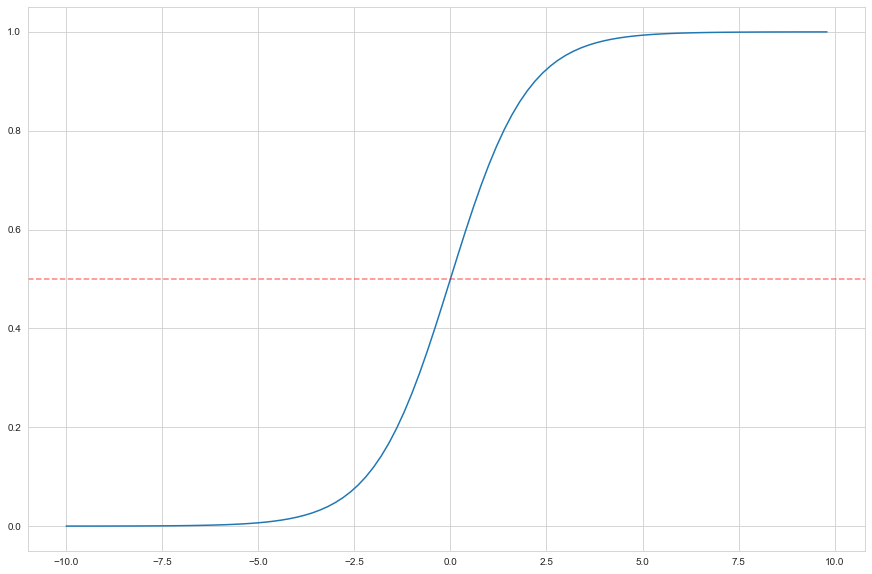

In [4]:
fig = plt.figure(figsize=(15,10))
plt.plot(x, sig)
plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.5)
plt.show()

# Decision Boundaries and Error Types

Here we have our decision boundary at exactly halfway along our curve. This means that any data point that falls on 0 or higher on our curve will get classified as a 1, and anything below gets classified as a 0. 

Do you remember our different error types, though?


<img src="lecture_images/error_types.jpeg" alt="Error Types" style="width:50%;height:50%"/>

If we want to minimize the likelihood of a False Negative (Type II Error) (classifying something as a negative instance when it's really a positive instance), we can change the threshold of our decision boundary so that it's higher. An example of this might be if you're classifying whether or not someone will pay back a loan. In a case like that, it pays to be extra cautious and assume the worst of people.

Similarly, if we want to minimize the likelihood of a False Positive (classifying something as a positive instance when it's really a negative instance), we can move our decision boundary lower, so that more cases get classified as positive instances. In the healthcare field, False Positives are often preferred over false negatives - better safe than sorry. So, if you were building a logistic regression model to predict if a tumour was malignant, you would may want to bias your model to predict that a tumour is malignant.

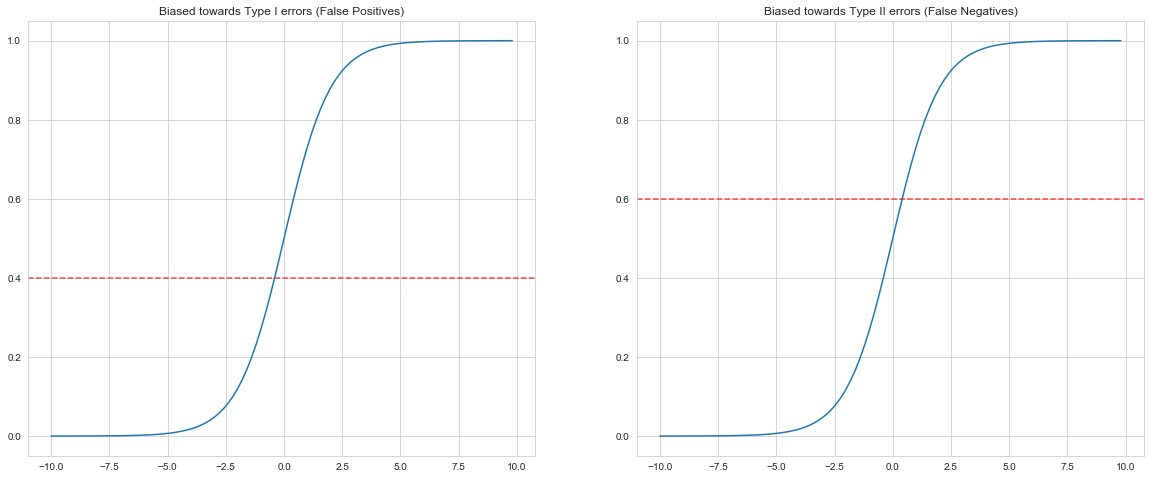

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,8))
ax1.plot(x, sig)
ax1.axhline(y=0.4, color='red', linestyle='--', alpha=0.7)
ax1.title.set_text('Biased towards Type I errors (False Positives)')

ax2.plot(x, sig)
ax2.axhline(y=0.6, color='red', linestyle='--', alpha=0.7)
ax2.title.set_text('Biased towards Type II errors (False Negatives)')

plt.show()

## Logistic Regression works with what are called "Log Odds Ratios"

### 1) What are odds, and how do they relate to probabilities?

An odds ratio is the probability an event occurs divided by the probability that it doesn't occur:

$$ Odds(P(y=1)) = \frac{P(y=1)} {1 - P(y=1)} $$

How do we interpret this? If the probability an event occurs is 0.8, the odds ratio will be:

$$\frac{0.8}{1-0.8} = \frac{8}{0.2} = 4$$ 

We can interpret this as a 4:1 ratio that our event occurs.

### 2) What are log odds?

The transformation from probabilities to odds is *monotonic*, meaning it's constantly increasing. Log odds are the same basic calculation as the odds, but we apply a natural logarithm to output. The log odds are also monotonic, but increase at a slower rate. Visually, it looks like this:

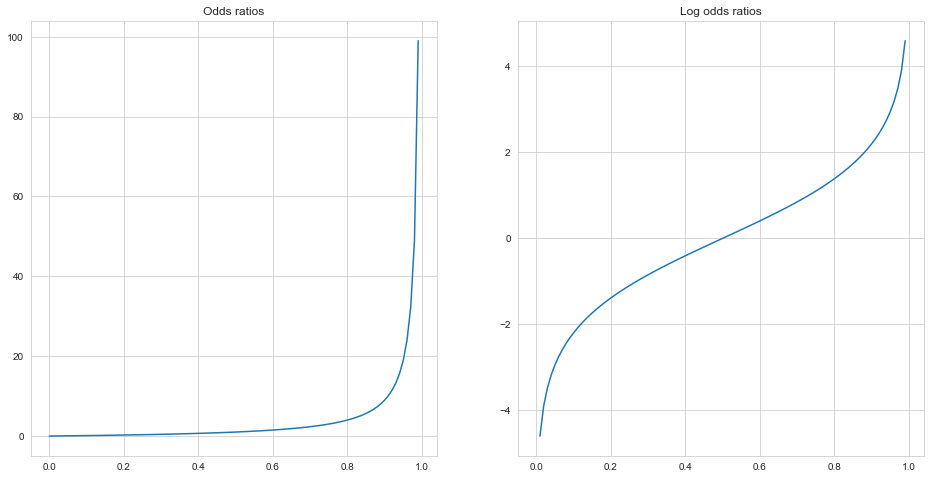

In [6]:
# Calculate odds and log odds for 100 probabilities between 0 and 1
probs = np.arange(0, 1, 0.01)

calculate_odds = lambda probs: [x/(1-x) for x in probs]
odds = calculate_odds(probs)

log_transform = lambda odds: [math.log(x) if x > 0 else -float('inf') for x in odds]
logodds = log_transform(odds)

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (16, 8), sharex=True)

ax1.title.set_text('Odds ratios')
ax2.title.set_text('Log odds ratios')

ax1.plot(probs, odds)
ax2.plot(probs, logodds)
plt.show()

### Why bother with log odds vs. probabilities? 

For one, it gives us a greater range over which to build a model. Probabilities are between 0 and 1, which is a very restrictive range over which to build a model, whereas the log-transform maps our ranges from -$\infty$ to $\infty$. And of all the possible transformations we could apply to our probabilities, the log-transform is the easiest to interpret.

# Some math behind logistic regression:

A logistic regression model allows us to establish a relationship between a binary outcome variable and a group of predictor variables. It models the *logit-transformed probability* as a linear relationship with the predictor variables.

Mathematically, this looks like:

$$ logit(P(y=1)) = log\left(\frac{P(y=1)}{1 - P(y=1)}\right) = \beta_0 + \beta_1x_1 + ... + \beta_kx_k$$

Our objective is to find values for our coefficients $\beta_1, \beta_2 ... \beta_k$ such that the model estimates a high probability for positive instance (y = 1) and low probabilities for negative instances (y = 0). 


## Cost Functions

How do we actually compute the maximum likelihood estimates for our $\beta$ parameters? We'll need a **cost function**. Logistic regression uses the following cost function for a single training instance:

$$ c(\theta) = \begin{cases} 
        -log(\hat{p}) & y = 1 \\
        -log(1-\hat{p}) & y = 0 \\
\end{cases}
$$

$-log(t)$ grows quickly when $t$ approaches 0, so the cost function will be large if the model predicts a low probability for a positive instance or a high probability for a negative instance. Similarly, it is close to 0 for values near 1.

The cost function over the whole training set is just the average of over all training instances ($\theta$ represents a *vector*, or list, of all our training instances):

$$ J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)}log\left(\hat{p}^{(i)}\right) +  \left(1 - y^{(i)}\right)log\left(1-\hat{p}^{(i)}\right)\right]$$

Minimizing this cost function requires a bit of calculus. We'll need to use an algorithm called *Gradient Descent*. We won't go into the specifics of the calculus of Gradient Descent in this lesson, but there are plenty of great tutorials you can find on Youtube to help explain the concept. We highly recommend one by math education channel 3blue1brown. You can watch it at this link:

https://www.youtube.com/watch?v=IHZwWFHWa-w

Gradient descent is the basis for how all modern neural networks learn, so it's definitely worthwhile to spend the twenty minutes watching this video. 


However, if you're familiar with partial derivatives, the equation for our Gradient Descent cost function looks like this:

$$ \frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\left(\sigma\left(\theta^{T}x^{(i)}\right) - y^{(i)}\right)x_j^{(i)}$$

Visually, we can think of gradient descent like this:

<img src="lecture_images/gradient_descent.png" style="height: 70%; width: 70%" />

## Cross-Entropy Cost functions

Cross-Entropy cost functions are incredibly popular across different machine learning techniques. They give us a way of comparing probability distributions - ie; how well an estimated class of probability matches the target class. 

Mathematically, that is defined as follows:

$$J(\Theta) = -\frac{1}{m}\sum_{k=1}^Ky_k^{(i)}log\left(\hat{p}_k^{(i)}\right)$$

Where $y_k^{(i)}$ is the target probability that the $i^{th}$ instance of $y$ belongs to class $k$. We use cross entropy loss when we're trying to classify something with multiple output classes (handwritten digits, animals, plants, etc...)

# Classifying Handwritten Digits using Multinomial Logistic Regression 
## (AKA Softfmax Regression)

## Softmax vs. Binary Logistic Regression:

Now that we have a sense of what logistic regression is and how it works, let's build a model to classify handwritten digits. Note, everything we've talked to up until now has had to do with Binray Logistic Regression - a case where you have only two classes: 1 or 0. 

In Multinomial Logistic Regression, we have multiple classes we're trying to predict between. In the case of handwritten digits, the question is not whether the number is an 8 or not an 8, but if it's a 1, 2, 3, 4, 5, 6, 7, 8 or 9. 

How does this work?

It's not much different than basic Binary Regression! We simply compute the log odds for each class, and use the class with the highest log odds. Additionally, instead of using the sigmoid function, we use something called the Softmax function. 

<img src="lecture_images/multinomial_logistic.png" />

### Quick overview of Softmax function:

The softmax is a multi-class sigmoid function. It first computes a score $s_k(x)$ for each class k, and estimates the probability of class by applying the softmax softmax function. To compute an individual score, the equation is:

$$s_k(x) = \left(\theta^{(k)}\right)^Tx$$

To then estimate the probality $\hat{p}_k$, that an instance belongs to class $k$, we run the score through the softmax function:

$$ \hat{p} = \sigma(s(x))_k = \frac{e^s_k(x)}{\sum_{j=1}^K e^{s_j(x)}} $$

where,
- K is the number of classes
- $s(x)$ is a vector containing scores of each class for the instance x
- $\sigma(s(x))_k$ is the estimated probability that instance x belongs to class $k$.

The Softmax function has two important constraints that make it useful for the sort of multiclass prediction we're doing:

- All the outputs are independent
- The sum of all the softmax outputs equals 1

The second constraint (which is only possible if the first constraint holds) is important because it means that **increasing** the value of one class makes all the other classes decrease. 

# Quick Intro to PyTorch

Because we're about to transition into the world of neural networks, we'll be building this model using a popular machine learning framework built by Facebook called PyTorch. PyTorch is a relatively accessible framework within a lot of pre-built functionality. Additionally, because it's been gaining popularity, there are a number of resources online for us to use.

In [7]:
# Install PyTorch:
!pip3 install torch torchvision

In [63]:
import torch
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms # transforms lets us transform images into PyTorch tensors 
from torch.autograd import Variable

In [64]:
# Download training dataset
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
# Download test dataset
test_dataset = datasets.MNIST(root='./data',
                             train=False,
                             transform=transforms.ToTensor())


In [98]:
##################
# Hyperparameters
#################

# Images are of size 28x28, so our input size is 784 pixels in total:
input_size = 784
# We have ten classes to predict (0-9):
num_classes = 10 
# Run 10 rounds of training start to finish:
epochs = 5
# Batch size is the number of samples processed before the model is updated:
batch_size = 100
# How quickly do we want our model to learn from its mistakes (play around with this to see how your model changes):
learning_rate = 0.001
momentum = 0.9

In [99]:
# DataLoaders are a utility PyTorch provides that take care of pre-processing data for our model
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                         batch_size=batch_size,
                                         shuffle=False)

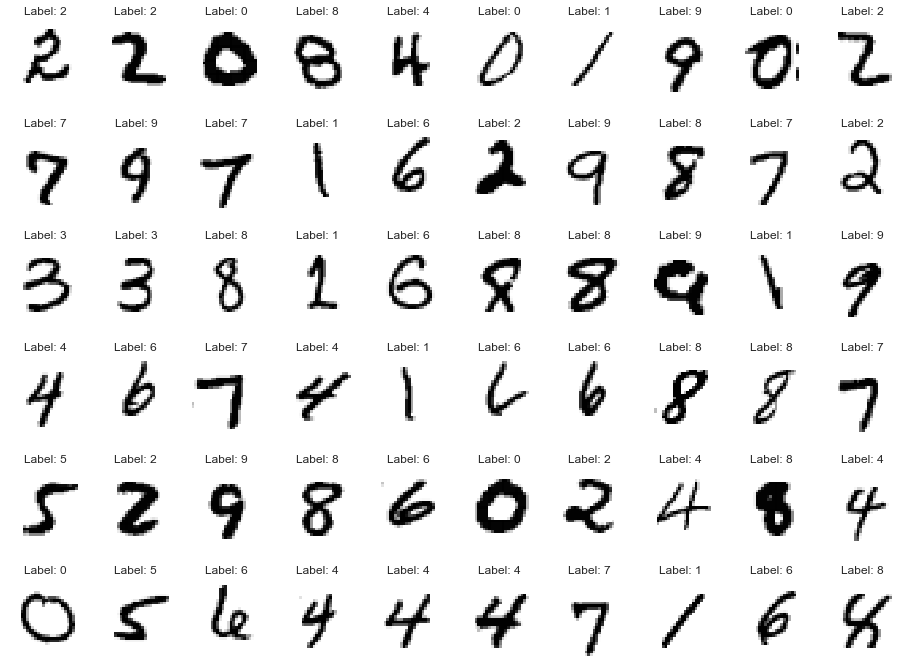

In [100]:
def view_images(images, labels, num_images):
    figure = plt.figure(figsize=(16,12))
    for index in range(1, num_images + 1):
        ax = plt.subplot(6, 10, index)
        label = labels[index].item()
        ax.set_title('Label: ' + str(label))
        plt.axis('off')
        plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')
    plt.show()

# Plot an example:
images, labels = iter(train_loader).next()
view_images(images, labels, num_images=60)

### Defining our model using PyTorch:

All models in PyTorch are a subclass of "nn.Module". Our logistic model just requires a single pass forward to sum our parameters - this is what the nn.Linear method does. The softmax of the output is calculated internally, so we don't need to specify it explicitly.

In [101]:
class LogisticRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_size, num_classes)
        
    def forward(self, x):
        output = self.linear(x)
        return output

In [102]:
# Now, let's create an instance of our model:
logistic_model = LogisticRegression(input_size, num_classes)
criterion = nn.CrossEntropyLoss() # Criterion is our Cross Entropy cost function
optimizer = torch.optim.SGD(logistic_model.parameters(), lr=learning_rate, momentum=momentum)  # SGD stands for Stochastic Gradient Descent

In [103]:
# Train the model:
def train(model, epochs):
    for epoch in range(epochs):

        running_loss = 0
        for i, (images, labels) in enumerate(train_loader):
            # Flatten MNIST images into a 784 long vector
            images = images.view(images.shape[0], -1)

            # Training pass
            optimizer.zero_grad()

            output = model(images)
            loss = criterion(output, labels)

            #This is where the model learns by backpropagating
            loss.backward()

            #And optimizes its weights here
            optimizer.step()

            running_loss += loss.item()
   
            # Print out progress:
            if (i+1) % 100 == 0:
                print('Epoch: [% d /% d], Step: [%d /% d], Loss: %.4f'
                     % (epoch + 1, epochs, i + 1, len(train_dataset) // batch_size, loss.item())) 



In [104]:
def test(model):
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = Variable(images.view(-1, 28*28))
        outputs = model(images)
            
        values, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

    print('Accuracy of the model on the 10000 test images: % d%%' % ( 
            100 * correct / total))


In [105]:
train(logistic_model, epochs)    

Epoch: [ 1 / 5], Step: [100 / 600], Loss: 1.5702
Epoch: [ 1 / 5], Step: [200 / 600], Loss: 1.2002
Epoch: [ 1 / 5], Step: [300 / 600], Loss: 1.0814
Epoch: [ 1 / 5], Step: [400 / 600], Loss: 0.7672
Epoch: [ 1 / 5], Step: [500 / 600], Loss: 0.7349
Epoch: [ 1 / 5], Step: [600 / 600], Loss: 0.7923
Epoch: [ 2 / 5], Step: [100 / 600], Loss: 0.7446
Epoch: [ 2 / 5], Step: [200 / 600], Loss: 0.6356
Epoch: [ 2 / 5], Step: [300 / 600], Loss: 0.7632
Epoch: [ 2 / 5], Step: [400 / 600], Loss: 0.6619
Epoch: [ 2 / 5], Step: [500 / 600], Loss: 0.6453
Epoch: [ 2 / 5], Step: [600 / 600], Loss: 0.5163
Epoch: [ 3 / 5], Step: [100 / 600], Loss: 0.6082
Epoch: [ 3 / 5], Step: [200 / 600], Loss: 0.6072
Epoch: [ 3 / 5], Step: [300 / 600], Loss: 0.5900
Epoch: [ 3 / 5], Step: [400 / 600], Loss: 0.4542
Epoch: [ 3 / 5], Step: [500 / 600], Loss: 0.4443
Epoch: [ 3 / 5], Step: [600 / 600], Loss: 0.5489
Epoch: [ 4 / 5], Step: [100 / 600], Loss: 0.5710
Epoch: [ 4 / 5], Step: [200 / 600], Loss: 0.5062
Epoch: [ 4 / 5], Ste

In [106]:
test(logistic_model)

Accuracy of the model on the 10000 test images:  89%


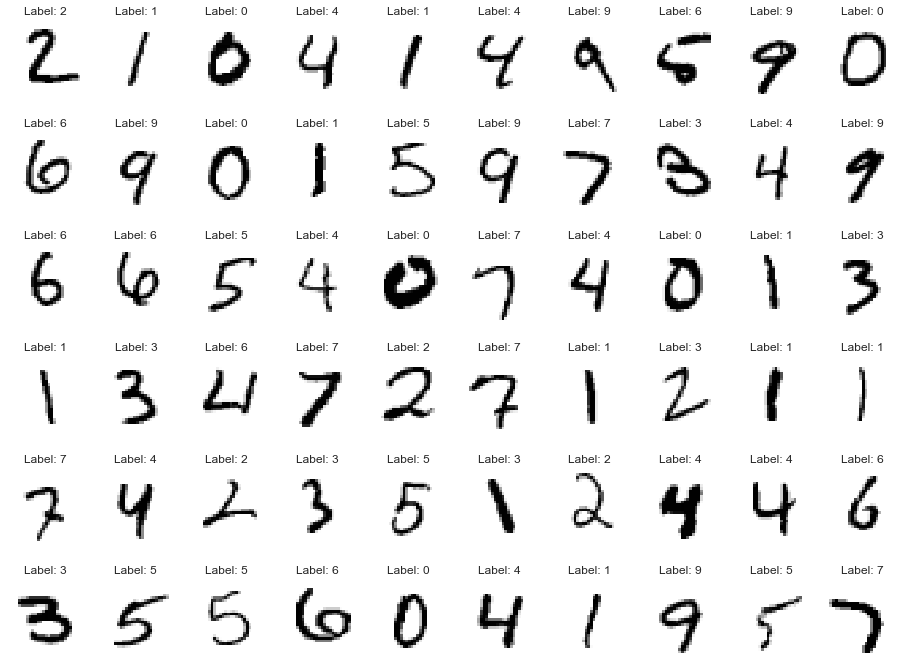

In [107]:
def visualize_predictions(model):
    # Get some example predictions:
    images, classes = next(iter(test_loader))
    images = Variable(images.view(-1, 28*28))

    outputs = logistic_model(images)
    values, predicted = torch.max(outputs.data, 1)

    # Plot an example:
    images, labels = iter(test_loader).next()

    view_images(images, predicted, 60)
    
visualize_predictions(logistic_model)

--------------------

# From Logistic Regression to Neural Networks

Neural Networks are similar to regression in a lot of ways. In fact, logistic regression can be thought of as a simple, one-layer neural network classifier.

<img src="lecture_images/logistic_to_nn.jpg" style="height:80%;width:80%" /> 


Let's take a quick look again at the structure of a logistic regression model:

<img src="lecture_images/logistic_nn.png" style="height:80%;width:75%"/>

Now, let's compare that to a basic feedforward neural network:

<img src="lecture_images/feedforward_nn_model.jpg" style="height:100%;width:80%" />

# Important Terminology for Neural networks:

- **Input**: data being fed to the network
- **Weight**: Strength of a connection between two nodes
- **Bias**: Default value for a neuron
- **Activation function**: Function that transforms the summed input - the output of the function decides whether a certain neuron will fire or not. 
- **Gradient Descent**: Mathematical basis for how neural networks *learn*
- **Backpropagation**: Algorithm that updates the weights in a neural network (also what lets them *learn*)
- **Tensor**: A generalized matrix - it can have any dimensions


## Comparison to biological Neurons:

<img src="lecture_images/bio_neuron.jpg" />

The basic idea of a neuron is that it either fires or stays silent. It receives input from other neurons, and if it reaches above a certain critical threshold, it will release an action potential. Additionally, neurons share stronger connections with neurons who represent more important information (ie; if neuron A recognizes trees, Neuron B recognizes leaves, and Neuron C recognizes cats, Neuron A will have a stronger connection to B than C.)

# Handwritten digit classification with neural networks:

We'll be creating a model that looks like this:

<img src="lecture_images/mnist_feedforward.png" />

Relu is a just a different activation function than a sigmoid activation function (it's a bit more efficient to compute, but you lose some detail). 

We've already imported all the relevant libraries, and written the code that downloads and structures the data, so let's jump right into building the network.

In [108]:
#################
# Hyperparameters
#################
input_size = 784
hidden_sizes = [128, 64]
output_size = 10
learning_rate = 0.001
momentum = 0.9
epochs = 10

In [109]:
nn_model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))

In [110]:
criterion = nn.NLLLoss() # Criterion is our Cross Entropy cost function
optimizer = torch.optim.SGD(nn_model.parameters(), lr=learning_rate, momentum=momentum) 

In [111]:
train(nn_model, epochs)

Epoch: [ 1 / 10], Step: [100 / 600], Loss: 2.2644
Epoch: [ 1 / 10], Step: [200 / 600], Loss: 2.2293
Epoch: [ 1 / 10], Step: [300 / 600], Loss: 2.1835
Epoch: [ 1 / 10], Step: [400 / 600], Loss: 2.0509
Epoch: [ 1 / 10], Step: [500 / 600], Loss: 1.9592
Epoch: [ 1 / 10], Step: [600 / 600], Loss: 1.7108
Epoch: [ 2 / 10], Step: [100 / 600], Loss: 1.5260
Epoch: [ 2 / 10], Step: [200 / 600], Loss: 1.2175
Epoch: [ 2 / 10], Step: [300 / 600], Loss: 1.0335
Epoch: [ 2 / 10], Step: [400 / 600], Loss: 0.8398
Epoch: [ 2 / 10], Step: [500 / 600], Loss: 0.5866
Epoch: [ 2 / 10], Step: [600 / 600], Loss: 0.5668
Epoch: [ 3 / 10], Step: [100 / 600], Loss: 0.5147
Epoch: [ 3 / 10], Step: [200 / 600], Loss: 0.5973
Epoch: [ 3 / 10], Step: [300 / 600], Loss: 0.6098
Epoch: [ 3 / 10], Step: [400 / 600], Loss: 0.4827
Epoch: [ 3 / 10], Step: [500 / 600], Loss: 0.4924
Epoch: [ 3 / 10], Step: [600 / 600], Loss: 0.6306
Epoch: [ 4 / 10], Step: [100 / 600], Loss: 0.3868
Epoch: [ 4 / 10], Step: [200 / 600], Loss: 0.3561


In [112]:
test(nn_model)

Accuracy of the model on the 10000 test images:  92%


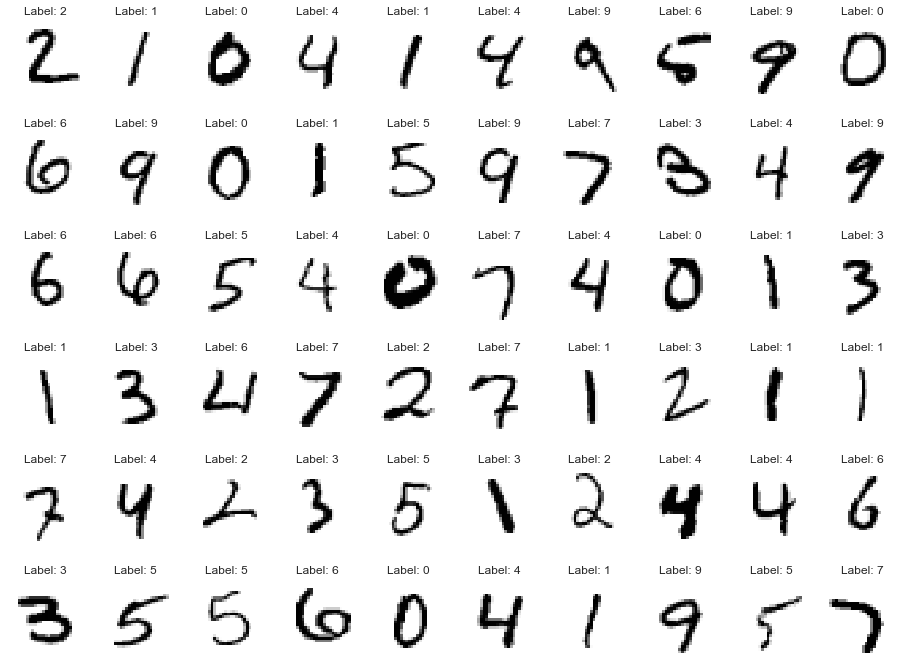

In [114]:
visualize_predictions(nn_model)